In [17]:
import pandas as pd

df = pd.read_csv("stackoverflow_nlp_posts_with_answers.csv")

df_cleaned = df[['title', 'body', 'tags', 'accepted_answer_body']]

df_cleaned.to_csv("stackoverflow_nlp_cleaned.csv", index=False)

print(" Cleaned file saved as 'stackoverflow_nlp_cleaned.csv'")


 Cleaned file saved as 'stackoverflow_nlp_cleaned.csv'


In [18]:
import pandas as pd

file_path = "stackoverflow_nlp_cleaned.csv"


df = pd.read_csv(file_path)


print(" Dataset loaded successfully.")
print(" Shape of the dataset:", df.shape)
print(" First 5 rows:")
print(df.head())


 Dataset loaded successfully.
 Shape of the dataset: (22267, 4)
 First 5 rows:
                                               title  \
0  NameError: name 'init_empty_weights' is not de...   
1  Why does Presidio with spacy nlp engine not re...   
2  GPT-2 and other models from huggingface -100 l...   
3  Trouble getting importing gensim to work in colab   
4        Store images instead of showing in a server   

                                                body  \
0  I am trying to set up hugging face locally and...   
1  I'm using spaCy with the pl_core_news_lg model...   
2  I understand the -100 label id is used so that...   
3  I am trying to import gensim into colab.\n!pip...   
4  I am running the code found on this site in my...   

                                                tags  \
0         nlp, huggingface-transformers, huggingface   
1                       python, nlp, spacy, presidio   
2   nlp, huggingface-transformers, pre-trained-model   
3  numpy, nlp, dependen

In [24]:
import pandas as pd
import re

df = pd.read_csv("stackoverflow_nlp_cleaned.csv")

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower() #text lowercasing
    text = re.sub(r'!\[.*?\]\(.*?\)', '', text) #remove markdown image links
    text = re.sub(r'http\S+|www\S+', '', text) #remove urls
    text = text.replace("_", " ") #replace underscores with spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #remove punctuations and specail symbols 
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['title'] = df['title'].apply(preprocess_text)
df['body'] = df['body'].apply(preprocess_text)
df['accepted_answer_body'] = df['accepted_answer_body'].apply(preprocess_text)

print("Preprocessing complete")
print(df.head(10))


Preprocessing complete
                                               title  \
0  nameerror name init empty weights is not defin...   
1  why does presidio with spacy nlp engine not re...   
2  gpt2 and other models from huggingface 100 lab...   
3  trouble getting importing gensim to work in colab   
4        store images instead of showing in a server   
5  presidio with langchain experimental does not ...   
6          opennlp postaggerme and chunkerme synergy   
7  underfitting pretrained glove lstm model accur...   
8                            cant compile marian nmt   
9  how to get custom column in the models forward...   

                                                body  \
0  i am trying to set up hugging face locally and...   
1  im using spacy with the pl core news lg model ...   
2  i understand the 100 label id is used so that ...   
3  i am trying to import gensim into colab pip in...   
4  i am running the code found on this site in my...   
5  i am using presidiola

In [26]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

df = pd.read_csv("stackoverflow_nlp_cleaned.csv")

#set of domain relevant keywords to be preserved
preserve_words = {
    "tokenization", "tokenize", "classification", "clustering", "summarization",
    "translation", "lemmatization", "stemming", "vectorization", "normalization",
    "embedding", "similarity", "detection", "generation", "inference",
    "bert", "gpt", "t5", "gpt2", "bert2bert", "word2vec", "fasttext", "lda",
    "attention", "encoder", "decoder", "contextual", "semantic", "syntax",
    "spacy", "nltk", "gensim", "huggingface", "transformers", "sklearn",
    "tensorflow", "keras", "pytorch",
    "pipeline", "model", "vector", "sentence", "text", "document", "corpus",
    "language", "detect", "identify", "parse", "tagging", "dependency",
    "how", "what", "why", "when", "which", "can", "should", "use"
}

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower() #text lowercasing
    text = re.sub(r'!\[.*?\]\(.*?\)', '', text) #remove markdown image links
    text = re.sub(r'http\S+|www\S+', '', text) #remove urls
    text = text.replace("_", " ") #replace underscore with spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split() #tokenizing

    #remove stopwords except the words in the preserv list
    filtered_tokens = [
        token for token in tokens
        if token in preserve_words or token not in ENGLISH_STOP_WORDS
    ]
    return ' '.join(filtered_tokens)

df['title'] = df['title'].apply(preprocess_text)
df['body'] = df['body'].apply(preprocess_text)
df['accepted_answer_body'] = df['accepted_answer_body'].apply(preprocess_text)

print("Preprocessing complete.")
print(df.head(10))


Preprocessing complete.
                                               title  \
0  nameerror init weights defined using hugging f...   
1  why does presidio spacy nlp engine recognize o...   
2  gpt2 models huggingface 100 label index traini...   
3        trouble getting importing gensim work colab   
4                store images instead showing server   
5  presidio langchain experimental does detect po...   
6              opennlp postaggerme chunkerme synergy   
7  underfitting pretrained glove lstm model accur...   
8                                 compile marian nmt   
9  how custom column models forward function when...   

                                                body  \
0  trying set hugging face locally im running iss...   
1  im using spacy pl core news lg model extract n...   
2  understand 100 label id used predictions inclu...   
3  trying import gensim colab pip install gensim ...   
4  running code site server like store images ins...   
5  using presidiolangch

In [4]:
pip install wordcloud matplotlib



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


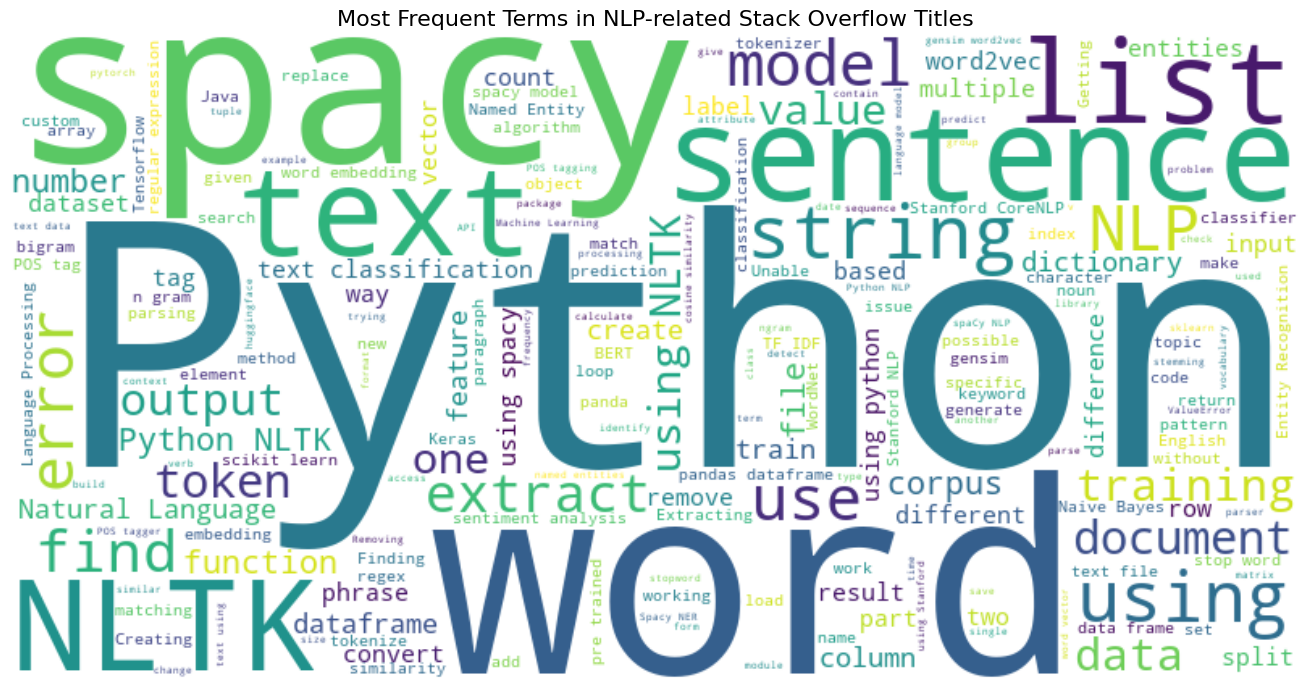

In [27]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv("stackoverflow_nlp_cleaned.csv")

#combine preprocessed titles into one text string
text = ' '.join(df['title'].dropna().astype(str).tolist())


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Terms in NLP-related Stack Overflow Titles", fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
df.to_csv("preprocessed_cleaned_final.csv", index=False)

print(" Preprocessed dataset saved as 'preprocessed_cleaned_final.csv'")

 Preprocessed dataset saved as 'preprocessed_cleaned_final.csv'
